In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

from notebook_utils import NotebookUtilities
from os import path as osp
from sklearn.metrics.pairwise import euclidean_distances
import cv2
import numpy as np
import os, re
import pandas as pd
import requests
import webcolors
import matplotlib.pyplot as plt

nu = NotebookUtilities(data_folder_path=osp.abspath('../data'), saves_folder_path=osp.abspath('../saves'))


# What Color is your Hair?

In [3]:

color_distance = lambda rgb, xkcd_color: euclidean_distances(np.array([rgb[:3]]), np.array([xkcd_color[:3]]))[0][0]

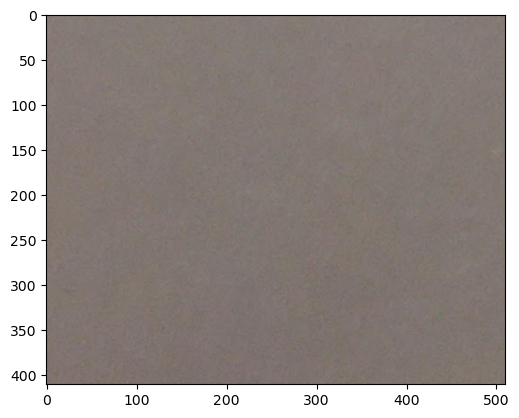

In [4]:

# Read the image
file_path = '../saves/png/Latest_Screenshot.png'
# file_path = '.../saves/png/photo_of_hair.png'
def get_rgb_img(file_path):
    imread_img = cv2.imread(file_path)
    
    # Convert to RGB (necessary for xkcd search)
    img_rgb = cv2.cvtColor(imread_img, cv2.COLOR_BGR2RGB)

    return img_rgb
img_rgb = get_rgb_img(file_path)
plt.imshow(img_rgb);

In [5]:

def show_sample(rgb_tuple):
    
    # Extract only the first 3 channels (RGB)
    rgb_tuple = rgb_tuple[:3]
    
    # Create the 10x10 square with the truncated RGB color
    square = np.full((10, 10, 3), rgb_tuple, dtype=np.uint8)
    
    plt.imshow(square);

Average RGB in area: (128.98514860932207, 118.84799866418587, 113.50370211344878, 0.0)


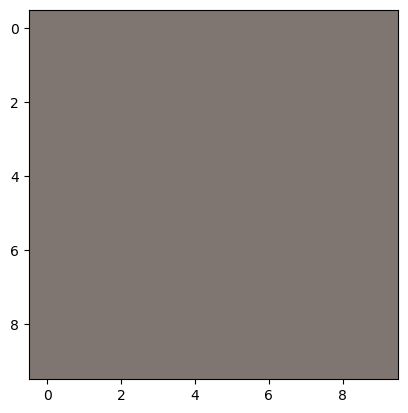

In [6]:

# Calculate the average RGB value within the area
avg_rgb = cv2.mean(img_rgb)

# Print the average RGB values
print(f'Average RGB in area: {avg_rgb}')
show_sample(avg_rgb)

In [9]:

import numpy as np

def get_unique_rgb_values(rbg_img):
    
    # Flatten the RGB image into a 1D array of pixels
    pixels = rbg_img.reshape((-1, 3))  # Reshape into (num_pixels, 3)
    unique_rgb_values = set(tuple(px) for px in pixels)

    return unique_rgb_values
def get_pixels_sorted_by_brightness(pixels):
    
    # Sort the pixels by brightness (sum of RGB values) in ascending order
    sorted_pixels = pixels[np.argsort(pixels.sum(axis=1))]

    return sorted_pixels

# Extract the darkest and lightest pixel (first and last in the sorted array)
unique_rgb_values = get_unique_rgb_values(img_rgb)
sorted_pixels = get_pixels_sorted_by_brightness(np.array(list(unique_rgb_values)))
darkest_rgb = [px for px in sorted_pixels if not np.all(px == [0, 0, 0])][0]
lightest_rgb = [px for px in sorted_pixels if not np.all(px == [255, 255, 255])][-1]

Darkest RGB value: [114 106  95]


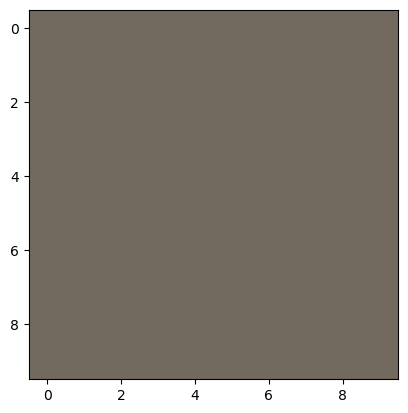

In [10]:

# Print the darkest RGB value
print(f'Darkest RGB value: {darkest_rgb}')
show_sample(darkest_rgb)

Lightest RGB value: [142 133 128]


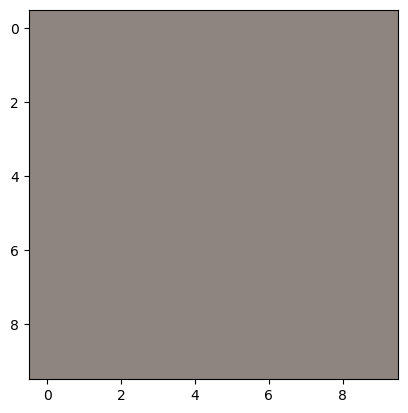

In [11]:

# Print the lightest RGB value
print(f'Lightest RGB value: {lightest_rgb}')
show_sample(lightest_rgb)

In [12]:

def get_nearest_xkcd_color(rgb_array, verbose=False):
    min_distance = float('inf')
    nearest_color = None
    for xkcd_name, xkcd_rgb in xkcd_colors.items():
        distance = color_distance(rgb_array, xkcd_rgb)
        if distance < min_distance:
            min_distance = distance
            nearest_color = xkcd_name
    if verbose: print(f'Nearest xkcd color: {nearest_color}')

    return nearest_color

In [13]:

if nu.pickle_exists('xkcd_colors'): xkcd_colors = nu.load_object('xkcd_colors')
else:
    file_path = osp.join(nu.saves_text_folder, 'xkcd_colors.txt')
    df = pd.read_csv(file_path, sep='\t', names=['xkcd_name', 'hex_code', 'delete_me'], skiprows=[0]).dropna(axis='columns', how='all')
    def get_rgb_array(hex_code):
        rgb_obj = webcolors.hex_to_rgb(hex_code)
    
        return np.array([rgb_obj.red, rgb_obj.green, rgb_obj.blue, 0.0])
        
    df['xkcd_rgb'] = df.hex_code.map(get_rgb_array)
    xkcd_colors = df.set_index('xkcd_name', drop=True).xkcd_rgb.to_dict()
    nu.store_objects(xkcd_colors=xkcd_colors)

In [14]:

colors_list = list(set([get_nearest_xkcd_color(px) for px in unique_rgb_values]))
conjunction_str = nu.conjunctify_nouns([f'"{n}"' for n in colors_list])
print(f'Describe this hair using these terms: {conjunction_str}.')

Describe this hair using these terms: "grey brown", "reddish grey", "brownish grey", "purple grey", "purplish grey", "medium grey", "greyish brown", "brown grey", and "warm grey".


In [18]:

for color in colors_list: print(f"show_sample(xkcd_colors['{color}'])")

show_sample(xkcd_colors['grey brown'])
show_sample(xkcd_colors['reddish grey'])
show_sample(xkcd_colors['brownish grey'])
show_sample(xkcd_colors['purple grey'])
show_sample(xkcd_colors['purplish grey'])
show_sample(xkcd_colors['medium grey'])
show_sample(xkcd_colors['greyish brown'])
show_sample(xkcd_colors['brown grey'])
show_sample(xkcd_colors['warm grey'])


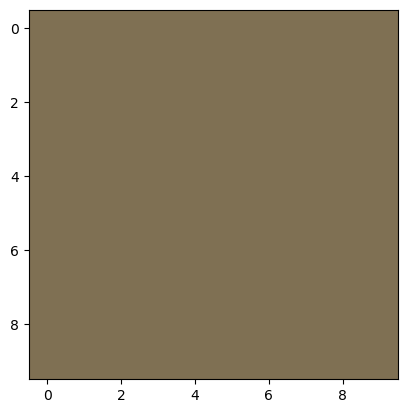

In [19]:

show_sample(xkcd_colors['grey brown'])

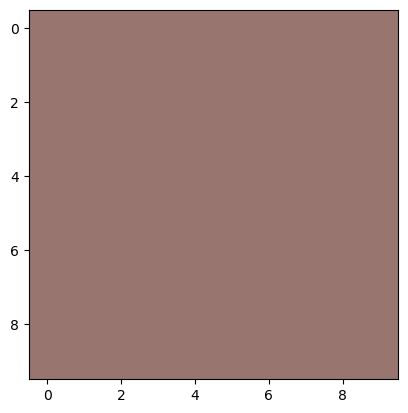

In [20]:

show_sample(xkcd_colors['reddish grey'])

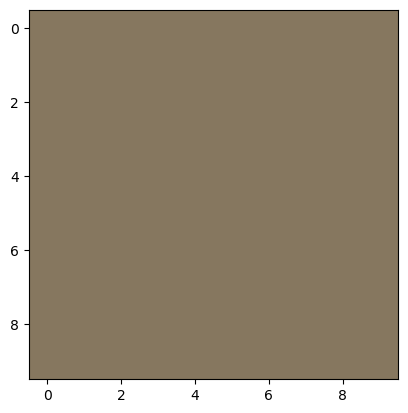

In [21]:

show_sample(xkcd_colors['brownish grey'])

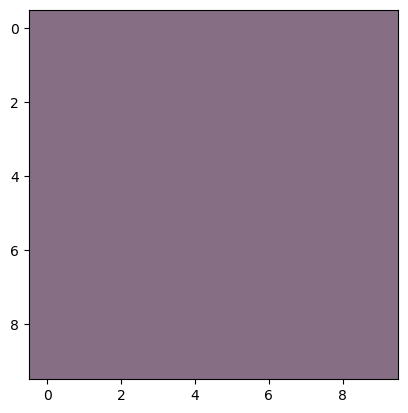

In [22]:

show_sample(xkcd_colors['purple grey'])

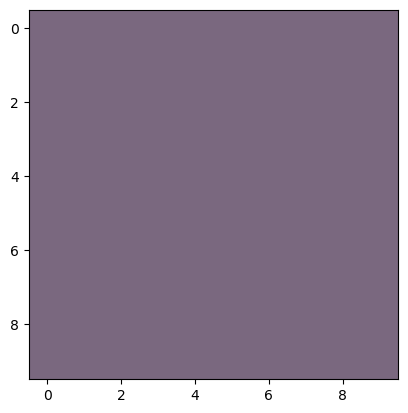

In [23]:

show_sample(xkcd_colors['purplish grey'])

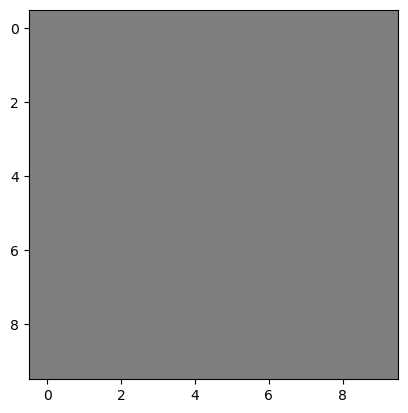

In [24]:

show_sample(xkcd_colors['medium grey'])

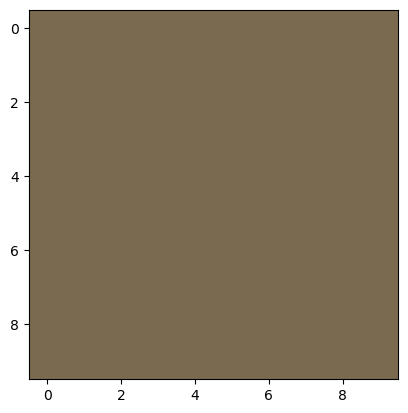

In [25]:

show_sample(xkcd_colors['greyish brown'])

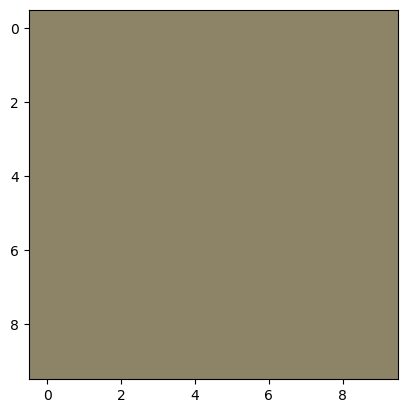

In [26]:

show_sample(xkcd_colors['brown grey'])

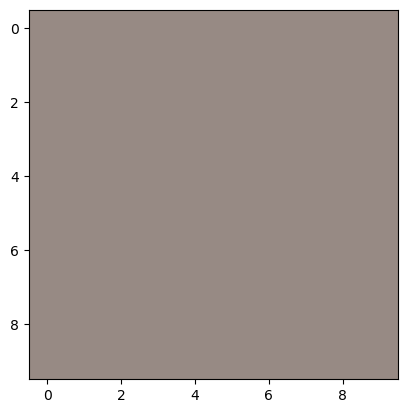

In [27]:

show_sample(xkcd_colors['warm grey'])


----

In [ ]:

def get_center_25_percent(img_rgb):
    
    # Calculate the width and height of the image
    img_width, img_height = img_rgb.shape[1], img_rgb.shape[0]
    
    # Calculate the center coordinates and half-width/height of the 25% area
    center_x = img_width // 2
    center_y = img_height // 2
    half_width = int(img_width * 0.25) // 2
    half_height = int(img_height * 0.25) // 2
    
    # Extract the center 25% area
    center_area = img_rgb[center_y - half_height : center_y + half_height, center_x - half_width : center_x + half_width]

    return center_area
center_area = get_center_25_percent(img_rgb)
plt.imshow(center_area);

In [ ]:

# Read the image again
imread_img = cv2.imread(file_path)

# Preprocessing steps
# Convert to grayscale for easier processing
gray = cv2.cvtColor(imread_img, cv2.COLOR_BGR2GRAY)

# Blur the image to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply edge detection to find hair boundaries
edges = cv2.Canny(blurred, 50, 150)

# Perform morphological closing to fill in hair gaps
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)

# Find the largest connected component, assuming it's the hair
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)

# Calculate the area of the hair (largest contour)
hair_area = cv2.contourArea(largest_contour)

# Print the area of the hair
print(f'Area of the hair: {hair_area} pixels')

# Optionally, draw the contour on the image and display it
# cv2.drawContours(imread_img, [largest_contour], -1, (0, 255, 0), 2)
# cv2.imshow('Image with hair contour', imread_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:

# Create a mask from the largest contour
mask = np.zeros(img_rgb.shape[:2], np.uint8)
cv2.drawContours(mask, [largest_contour], -1, 255, -1)

# Calculate the average RGB value within the mask
avg_rgb = cv2.mean(img_rgb, mask=mask)

# Print the average RGB values
print(f'Average RGB: {avg_rgb}')

In [ ]:

cv2.drawContours(imread_img, [largest_contour], -1, (0, 255, 0), 2)
plt.imshow(imread_img);

In [6]:

# Define the URL and filename
url = 'https://xkcd.com/color/rgb.txt'
file_path = osp.join(nu.saves_text_folder, 'xkcd_colors.txt')

# Send the request and check for success
response = requests.get(url)

# Write the content to the file
if response.status_code == 200:
    with open(file_path, 'wb') as f: f.write(response.content)
    print(f'Downloaded xkcd color list to {file_path}')
else: print(f'Error downloading file: {response.status_code}')

Downloaded xkcd color list to C:\Users\daveb\OneDrive\Documents\GitHub\notebooks\saves\txt\xkcd_colors.txt


In [33]:

[f'webcolors.{fn}' for fn in dir(webcolors)]

['webcolors.CSS2', 'webcolors.CSS21', 'webcolors.CSS21_HEX_TO_NAMES', 'webcolors.CSS21_NAMES_TO_HEX', 'webcolors.CSS2_HEX_TO_NAMES', 'webcolors.CSS2_NAMES_TO_HEX', 'webcolors.CSS3', 'webcolors.CSS3_HEX_TO_NAMES', 'webcolors.CSS3_NAMES_TO_HEX', 'webcolors.HTML4', 'webcolors.HTML4_HEX_TO_NAMES', 'webcolors.HTML4_NAMES_TO_HEX', 'webcolors.HTML5SimpleColor', 'webcolors.IntTuple', 'webcolors.IntegerRGB', 'webcolors.PercentRGB', 'webcolors.PercentTuple', 'webcolors.__all__', 'webcolors.__builtins__', 'webcolors.__cached__', 'webcolors.__doc__', 'webcolors.__file__', 'webcolors.__loader__', 'webcolors.__name__', 'webcolors.__package__', 'webcolors.__path__', 'webcolors.__spec__', 'webcolors.__version__', 'webcolors.constants', 'webcolors.conversion', 'webcolors.hex_to_name', 'webcolors.hex_to_rgb', 'webcolors.hex_to_rgb_percent', 'webcolors.html5', 'webcolors.html5_parse_legacy_color', 'webcolors.html5_parse_simple_color', 'webcolors.html5_serialize_simple_color', 'webcolors.name_to_hex', 'we

In [34]:

webcolors.rgb_to_name?

Signature:
webcolors.rgb_to_name(
    rgb_triplet: Union[webcolors.types.IntegerRGB, webcolors.types.HTML5SimpleColor, Tuple[int, int, int]],
    spec: str = 'css3',
) -> str
Docstring:
Convert a 3-:class:`tuple` of :class:`int`, suitable for use in an ``rgb()``
color triplet, to its corresponding normalized color name, if any
such name exists.

To determine the name, the triplet will be converted to a
normalized hexadecimal value.

.. note:: **Spelling variants**

   Some values representing named gray colors can map to either of two names in
   CSS3, because it supports both ``"gray"`` and ``"grey"`` spelling variants for
   those colors. This function will always return the variant spelled ``"gray"``
   (such as ``"lightgray"`` instead of ``"lightgrey"``). See :ref:`the documentation
   on name conventions <color-name-conventions>` for details.

Examples:

.. doctest::

    >>> rgb_to_name((255, 255, 255))
    'white'
    >>> rgb_to_name((0, 0, 128))
    'navy'

:param rgb_triplet: 